# Deep Knowledge Tracing Model (DKT)
This notebook will show you how to train and use the DKT. First, we will show how to get the data (here we use assistment-2009-2010-skill as the dataset). Then we will show how to train a DKT and perform the parameters persistence. At last, we will show how to load the parameters from the file and evaluate on the test dataset.

The script version could be found in [DKT.py](DCK.py)

# Data Preparation
Before we process the data, we need to first acquire the dataset which is shown in this [prepare_dataset.ipynb](prepare_dataset.ipynb)

In [1]:
import numpy as np
import torch
import torch.utils.data as Data
from torch.utils.data.dataset import Dataset
import tqdm


NUM_QUESTIONS = 123
BATCH_SIZE = 64
HIDDEN_SIZE = 10
NUM_LAYERS = 1


def get_data_loader(data_path, batch_size, shuffle=False):
    data = torch.FloatTensor(np.load(data_path))
    data_loader = Data.DataLoader(data, batch_size=batch_size, shuffle=shuffle)
    return data_loader


train_loader = get_data_loader('train_data.npy', BATCH_SIZE, True)
test_loader = get_data_loader('test_data.npy', BATCH_SIZE, False)

# Training and Persistence

In [2]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [3]:
from EduKTM import DKT

dkt = DKT(NUM_QUESTIONS, HIDDEN_SIZE, NUM_LAYERS)
dkt.train(train_loader, epoch=2)
dkt.save("dkt.params")

Epoch 0: 100%|██████████| 104/104 [00:02<00:00, 49.44it/s]


[Epoch 0] LogisticLoss: 40.565847


Epoch 1: 100%|██████████| 104/104 [00:01<00:00, 53.98it/s]
INFO:root:save parameters to dkt.params


[Epoch 1] LogisticLoss: 36.440039


# Loading and Testing

INFO:root:load parameters from dkt.params
evaluating: 100%|██████████| 43/43 [00:00<00:00, 98.04it/s] 


auc: 0.738390


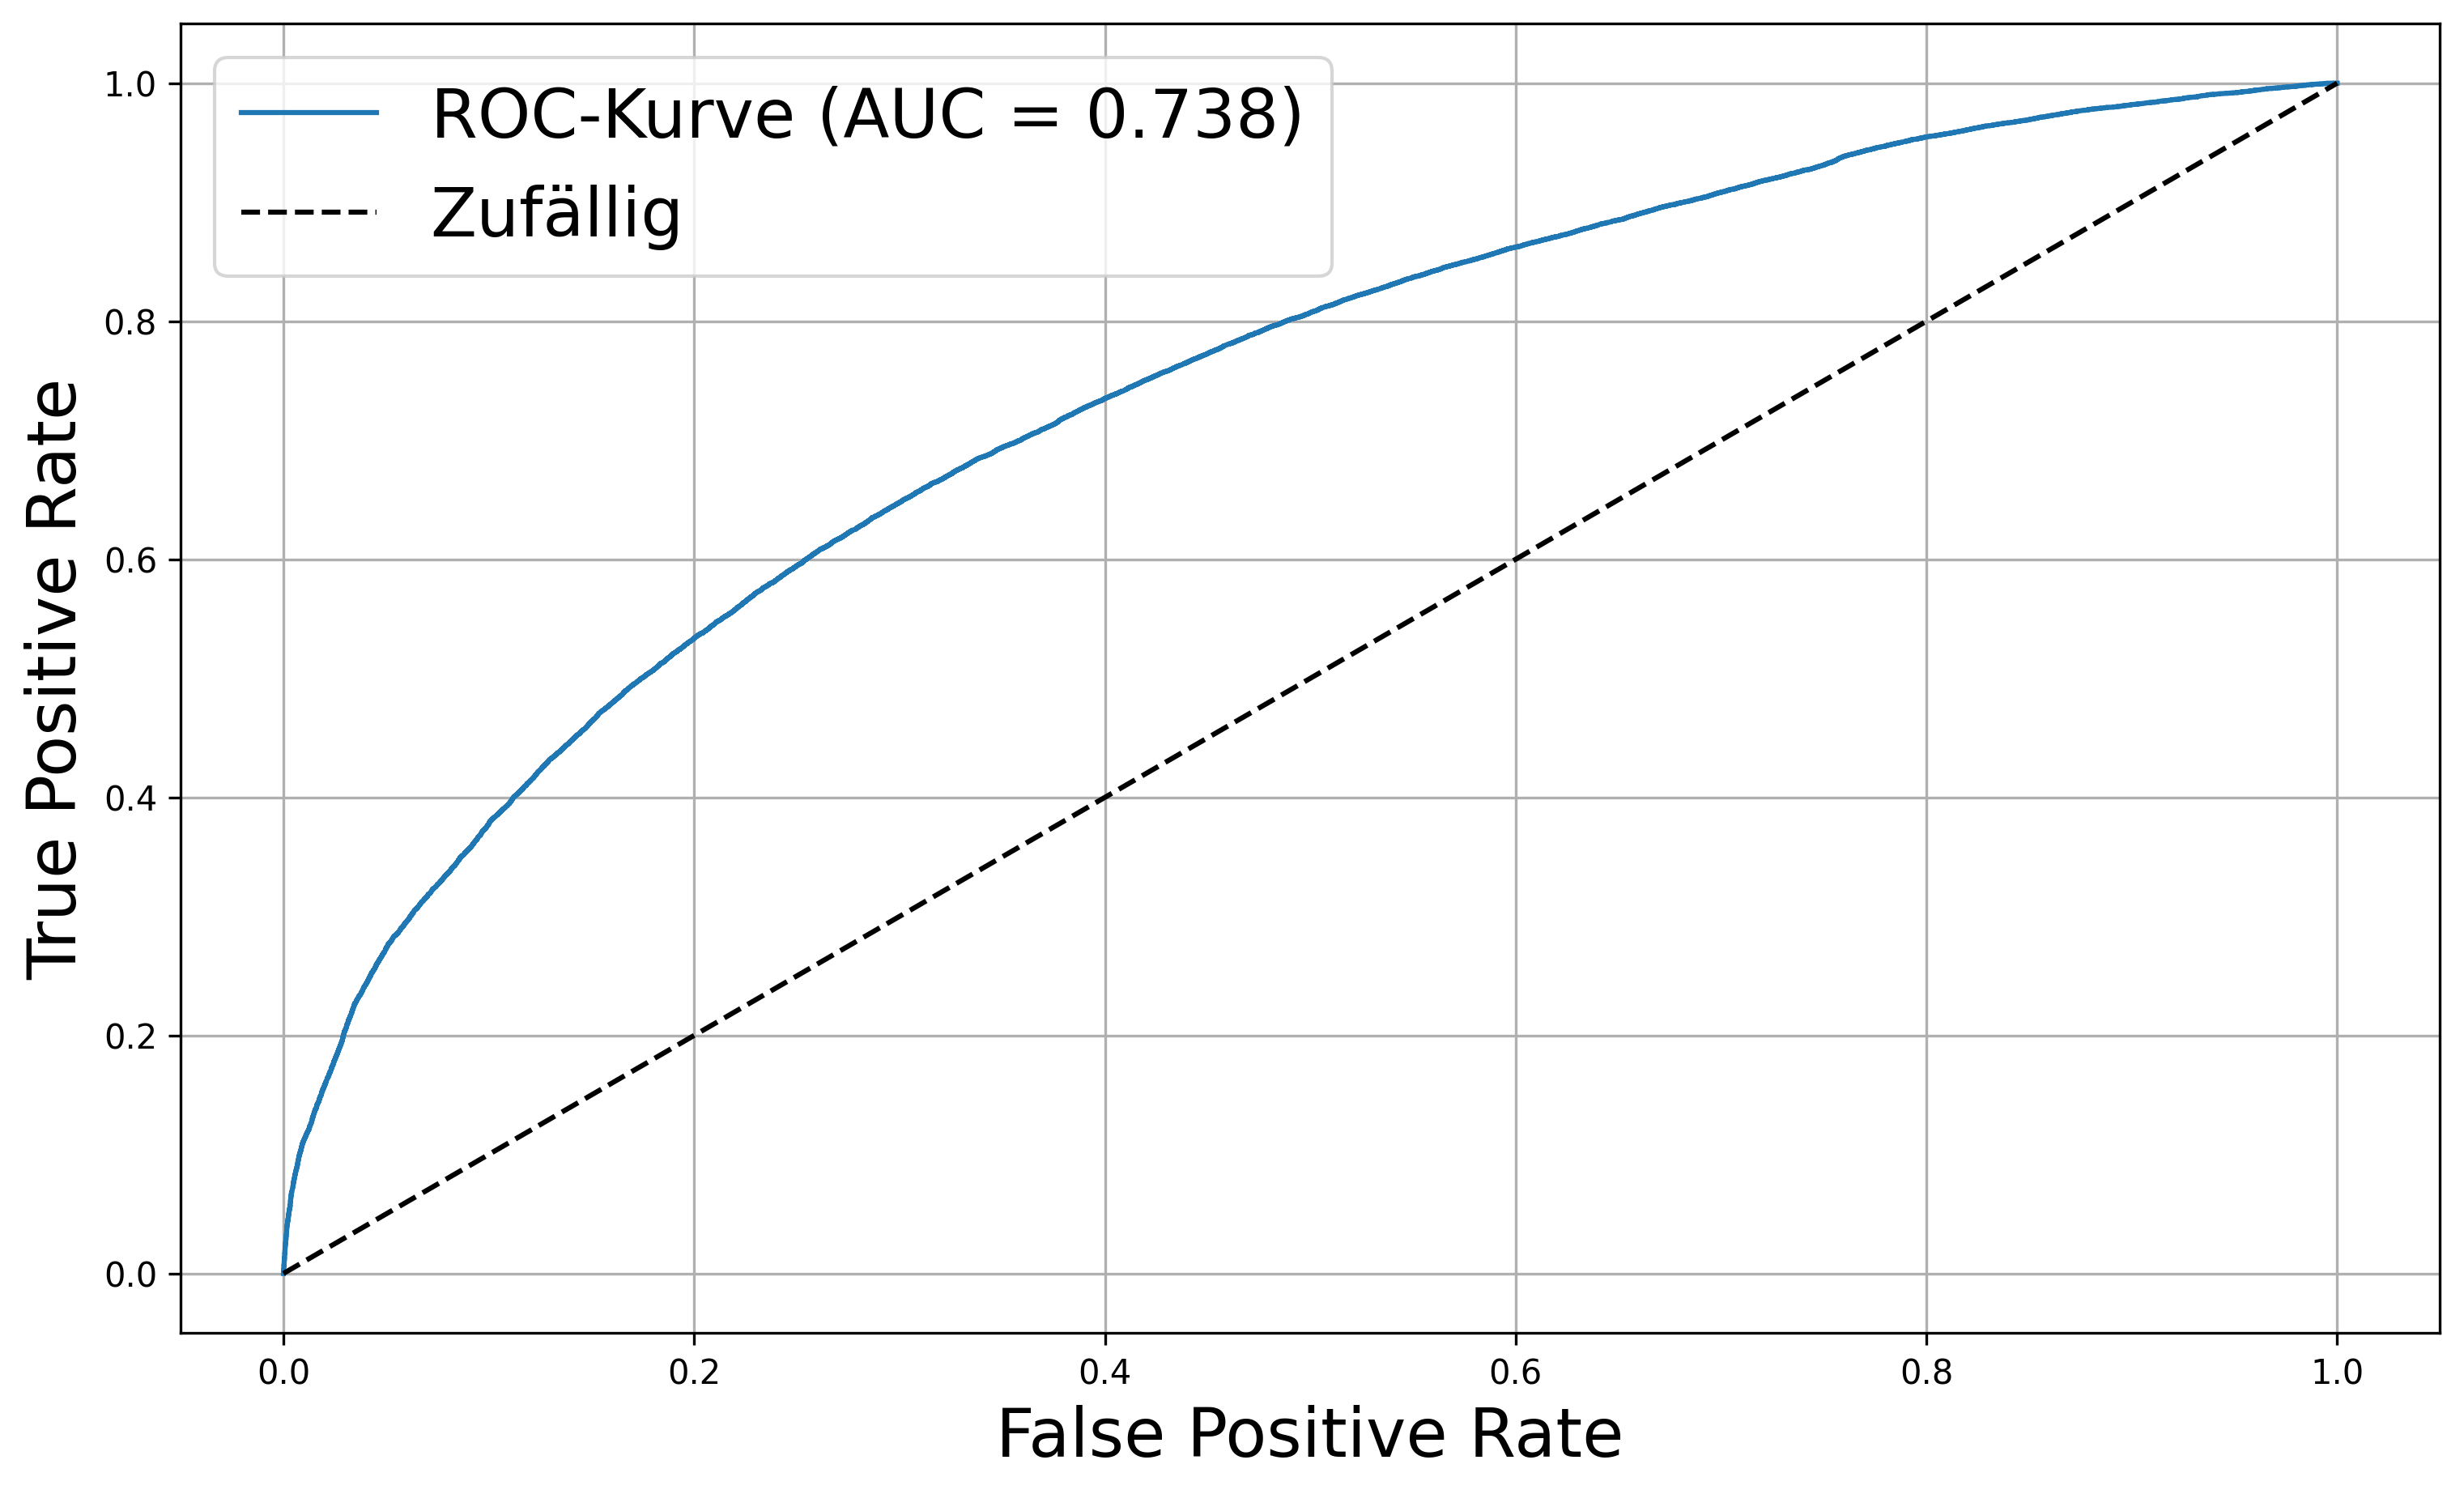

In [4]:
dkt.load("dkt.params")
auc = dkt.eval(test_loader)
print("auc: %.6f" % auc)